In [ ]:
# Utils
import pandas as pd
import numpy as np

# Sklearn
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score

# Hyperparameter Tuning Libraries
from sklearn.model_selection import GridSearchCV

# Visualization
import matplotlib.pyplot as plt

# Warnings
import warnings

In [ ]:
plt.style.use('ggplot')

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
#X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [ ]:
moon_X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
moon_y = pd.DataFrame(y, columns=['Label'])

In [ ]:
moon_X.head()

,Feature1,Feature2
0,-1.106897,0.042293
1,0.956800,0.456750
2,0.733516,0.584617
3,1.111407,-0.309214
4,0.209082,0.000657


In [ ]:
moon_y.head()

,Label
0,0
1,0
2,0
3,1
4,1


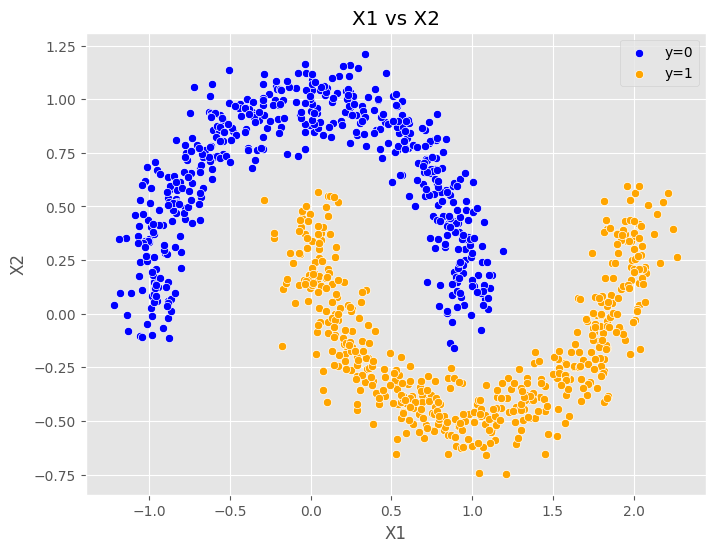

In [ ]:
plt.figure(
  figsize=(8, 6)
)

X1, X2 = X[:, 0], X[:, 1]

#plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(X1[y == 0], X2[y == 0], color='blue', label='y=0', edgecolor='white')

#plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', edgecolor='k')
plt.scatter(X1[y == 1], X2[y == 1], color='orange', label='y=1', edgecolor='white')


# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2')
plt.legend()

# Show the plot
plt.show()

# Dataset observation

#### We can clearly see that the classes can be splitted perfectly by a $3^\circ$ polynomial curve in the form: $ax^3+bx^2+cx+d$;


#### Cubic transformation for features $(x_1, x_2)$  

$$\phi(x) = \phi\begin{pmatrix}\begin{pmatrix}x_1 \\ x_2\end{pmatrix}\end{pmatrix} = \begin{pmatrix}x_1^3 \\ \sqrt{3}x_1^2x_2 \\ \sqrt{3}x_1x_2^2 \\ x_2^3\end{pmatrix}$$  

#### The $2$D input is converted to a $4$D output. The general linear model has the following formula

$$y = W^T . X + b$$  

#### Such that $X$ is the features, $W^T$ is the weights of each features and the term $b$ is the *bies*. Apllying the cubic transformation in both $W^T$ and $X$ and multypling it we got.

$$\phi(W)^T \phi(x) =  \begin{pmatrix}w_1^3 \\ \sqrt{3}w_1^2w_2 \\ \sqrt{3}w_1w_2^2 \\ w_2^3\end{pmatrix}^T . \begin{pmatrix}x_1^3 \\ \sqrt{3}x_1^2x_2 \\ \sqrt{3}x_1x_2^2 \\ x_2^3\end{pmatrix} = w_1^3x_1^3 + 3w_1^2x_1^2w_2x_2 + 3w_1x_1w_2^2x_2^2 + w_2^3x_2^3$$

#### Now we can see the purpose of multypling the second and the third term of transformation by $\sqrt{3}$. Remenbering about the Pascal's Triangle, we can realise that the expression above is similar to $(a + b)^3$;

$$w_1^3x_1^3 + 3w_1^2x_1^2w_2x_2 + 3w_1x_1w_2^2x_2^2 + w_2^3x_2^3=(w_1x_1 + w_2x_2)^3=\begin{pmatrix}\begin{pmatrix}w_1 \\ w_2\end{pmatrix}^T\begin{pmatrix}x_1 \\ x_2\end{pmatrix}\end{pmatrix}^3 \therefore \phi(w)^T\phi(x)=(w^T x)^3$$

# Training the model Support Vector Machine Classifier

### **Splitting the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  moon_X, moon_y, test_size=0.3, random_state=42
)

In [ ]:
X_train.shape

(700, 2)

### Visualizing the X_train dataset

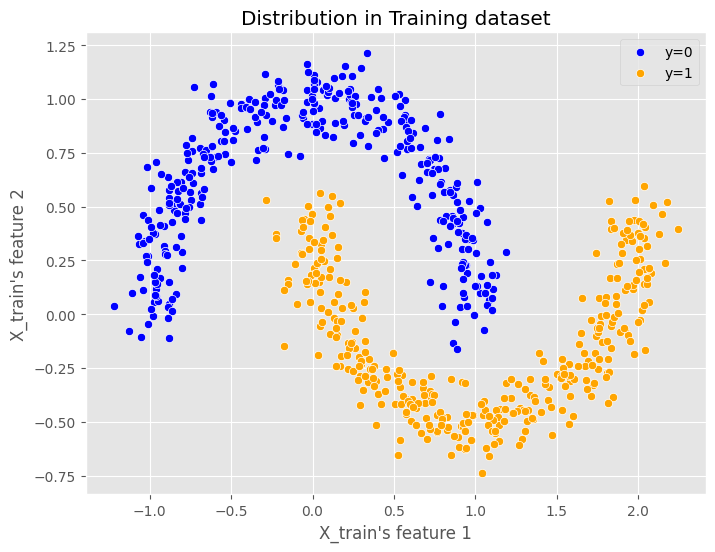

In [ ]:
# Take the features
feat1, feat2 = X_train['Feature1'], X_train['Feature2']

plt.figure(
  figsize=(8, 6)
)
#plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(
  x=feat1[y_train['Label'] == 0],
  y=feat2[y_train['Label'] == 0],
  color='blue',
  label='y=0',
  edgecolor='white'
)

#plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', edgecolor='k')
plt.scatter(
  x=feat1[y_train['Label'] == 1],
  y=feat2[y_train['Label'] == 1],
  color='orange',
  label='y=1',
  edgecolor='white'
)


# Add labels and title
plt.xlabel('X_train\'s feature 1')
plt.ylabel('X_train\'s feature 2')
plt.title('Distribution in Training dataset')
plt.legend()

# Show the plot
plt.show()

#  
### **Training the SVC model**

In [ ]:
svc = SVC(
  kernel='poly',
  degree=5,
  C=1,
  gamma=0.64,
  random_state=42
)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1, degree=5, gamma=0.64, kernel='poly')

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
svc_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'[+] Acc: {svc_acc: .5f}')

[+] Acc:  0.93667


# Hyperparameters Tuning

### **Grid Search**

In [ ]:
param_grid = {
  'kernel': ['poly'],
  'degree': [1, 2, 3, 4, 5, 6],
  'C': [0.01, 0.1, 1, 2, 5, 10],
  'gamma': [0.04, 0.08, 0.16, 0.32, 0.64]
}

# Grid Search
gscv = GridSearchCV(
  estimator=svc,
  param_grid=param_grid,
  cv=5
)

In [ ]:
warnings.filterwarnings('ignore')

gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=5, gamma=0.32, kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [0.04, 0.08, 0.16, 0.32, 0.64],
                         'kernel': ['poly']})

In [ ]:
best_svc = gscv.best_estimator_

In [ ]:
best_params = gscv.best_params_
best_score  = gscv.best_score_

In [ ]:
print(f'{best_params} => score: {best_score: .5f}')

{'C': 1, 'degree': 5, 'gamma': 0.64, 'kernel': 'poly'} => score:  0.93714
